# Import Libraries and Load Dataframe

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

%matplotlib inline

In [2]:
df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [3]:
df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


In [4]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,2.978962e+03,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,1.229724e+03,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,-1.187000e+01,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,1.660440e+03,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,3.136350e+03,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,4.083020e+03,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,5.820370e+03,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Methane   float64
 2   Ethylene  float64
 3   1         float64
 4   2         float64
 5   3         float64
 6   4         float64
 7   5         float64
 8   6         float64
 9   7         float64
 10  8         float64
 11  9         float64
 12  10        float64
 13  11        float64
 14  12        float64
 15  13        float64
 16  14        float64
 17  15        float64
 18  16        float64
dtypes: float64(19)
memory usage: 605.7 MB


# Split Data into Train, Test, and Deployment Sets

In [4]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y = df[['Methane', 'Ethylene']]


# Split data sets evenly into training, test, and deployment (40%, 30%, 30%)
x1_train, x1_deployment_test, y_train, y_deployment_test = train_test_split(x1, y, test_size=0.6, random_state=42, shuffle = False)
x1_test, x1_deployment, y_test, y_deployment = train_test_split(x1_deployment_test, y_deployment_test, test_size = 0.5, shuffle =  False)

In [8]:
x1_deployment.info(), x1_train.info(), x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378906 entries, 0 to 1378905
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1378906 non-null  float64
 1   1       1378906 non-null  float64
 2   2       1378906 non-null  float64
 3   3       1378906 non-null  float64
 4   4       1378906 non-null  float64
 5   5       1378906 non-null  float64
 6   6       1378906 non-null  float64
 7   7       1378906 non-null  float64
 8   8       1378906 non-null  float64
 9   9       1378906 non-null  float64
 10  10      1378906 non-null  float64
 11  11      1378906 non-null  float64
 12  12      1378906 non-null  float64
 13  13      1378906 non-null  float64
 14  14      1378906 non-null  float64
 15  15      1378906 non-null  float64
 16  16      1378906 non-null  float64
dtypes: float64(17)
memory usage: 189.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 2799598 entries, 1378906 to 4178503
Data columns (total 17 colu

(None, None, None, None)

In [9]:
x1_deployment

,Time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378901,13789.54,2524.21,1728.10,2658.38,2835.57,899.03,1142.75,3076.51,3235.10,3523.21,2809.87,2640.41,2168.26,819.95,865.68,2996.30,2299.56
1378902,13789.55,2497.46,1751.65,2660.47,2843.61,902.70,1148.01,3061.50,3220.86,3521.42,2814.68,2644.06,2179.36,834.07,856.08,3012.54,2320.28
1378903,13789.56,2509.42,1730.12,2666.21,2833.69,911.42,1126.40,3046.52,3225.70,3521.72,2803.47,2655.52,2189.99,826.05,847.07,2979.82,2307.20
1378904,13789.57,2517.57,1732.58,2677.45,2845.76,896.90,1152.05,3051.51,3207.51,3510.13,2809.07,2656.82,2179.36,823.19,854.93,2988.06,2304.98


In [6]:
# Combine the dataframes
train_df = pd.concat([x1_train, y_train], axis = 1)
test_df = pd.concat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 
(Need to verify each sensor is working)

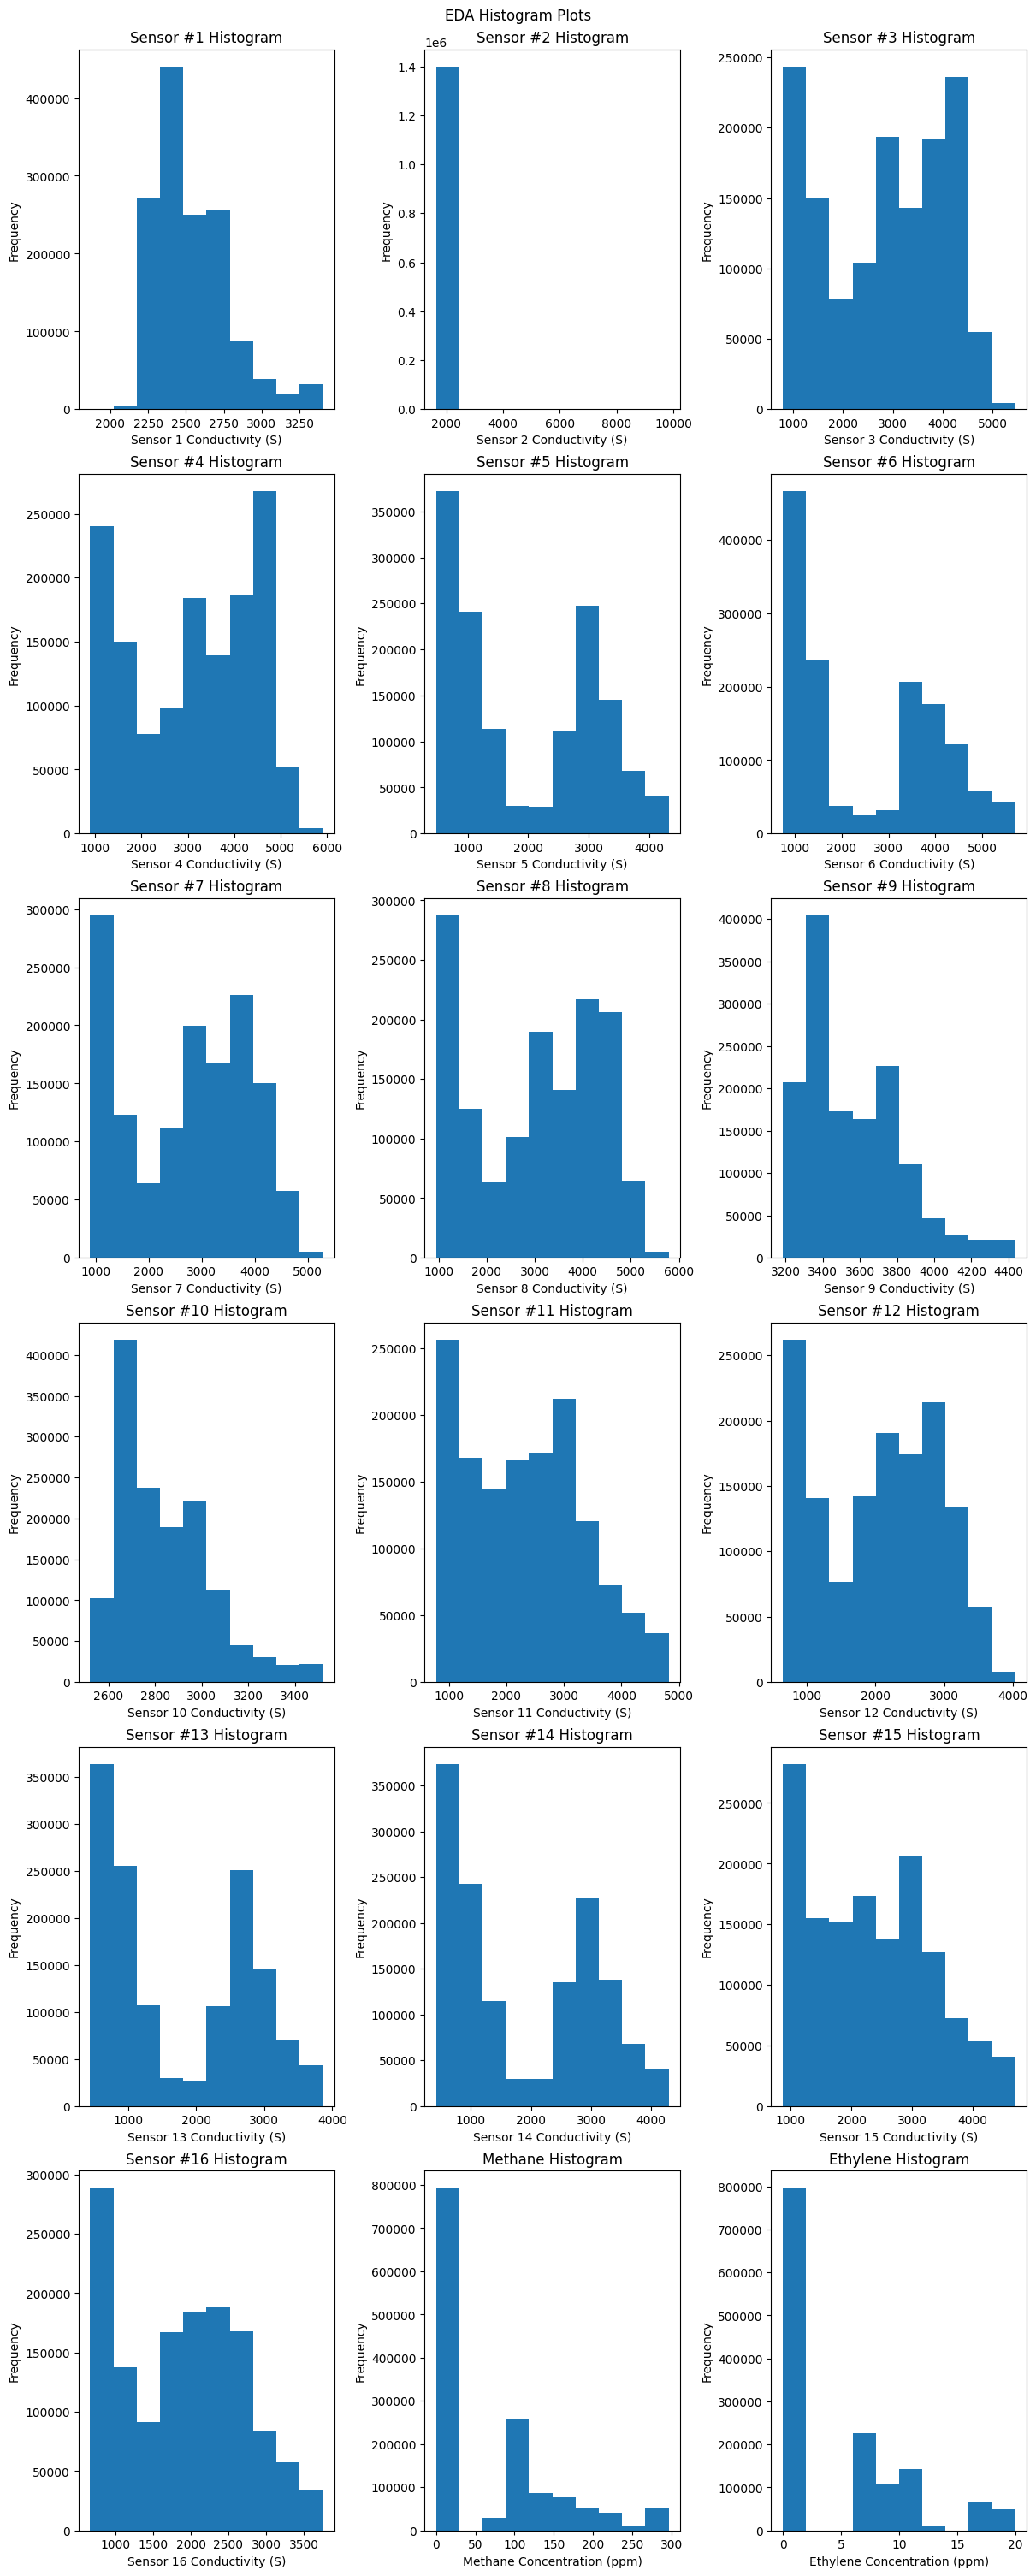

In [12]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [13]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

In [ ]:
# Plot standard plots (all histograms + a time scatter plot) over all datapoints
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = df.iloc[:,i].name
    if i > 2:
        ax_scatter_conduct.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors Of All Datapoints") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations Of All Datapoints")
        ax_scatter_concentration.legend()   
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


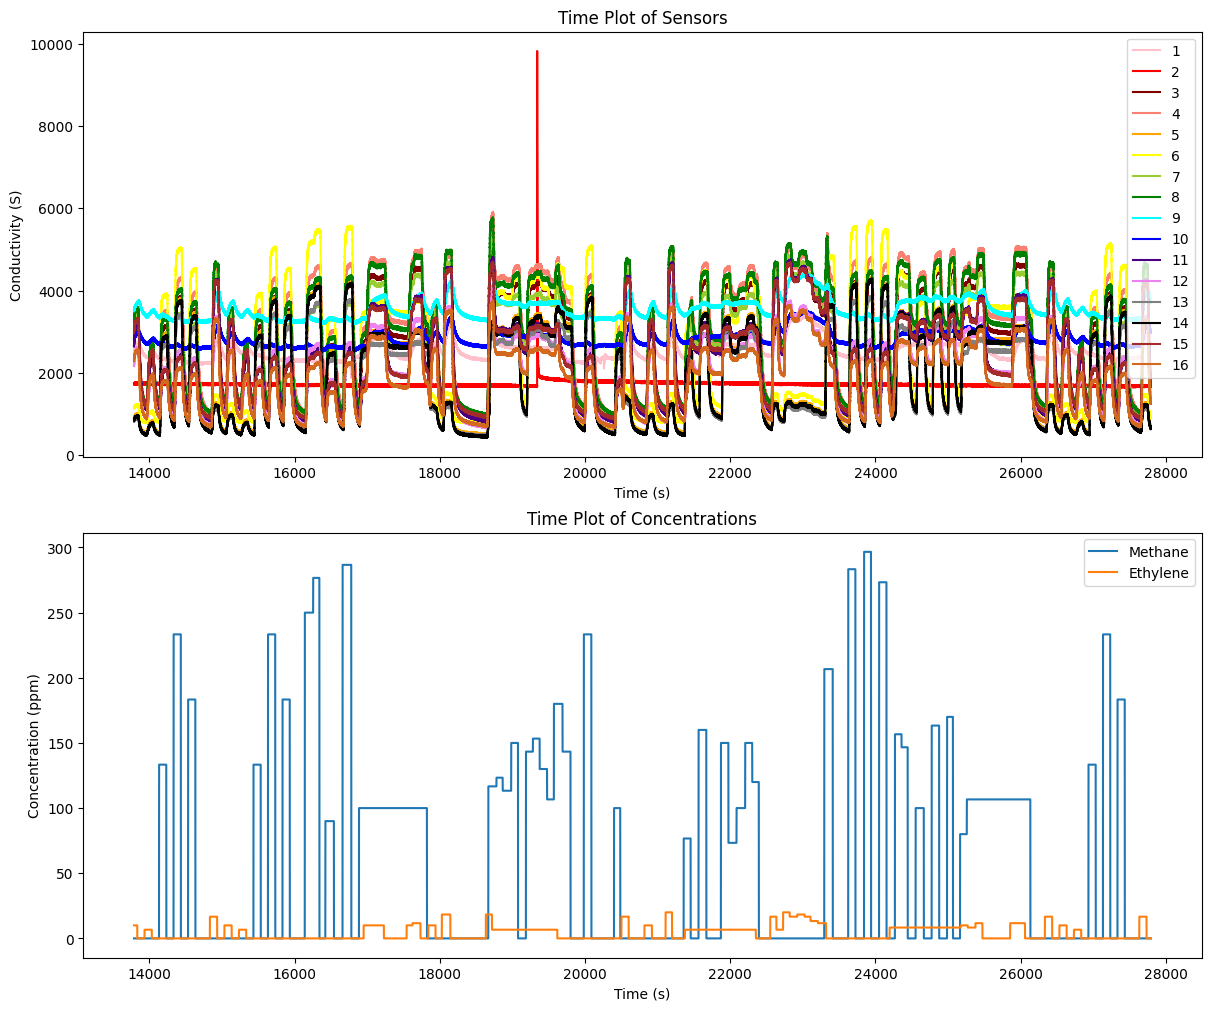

In [14]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

Let's check each sensor of each type

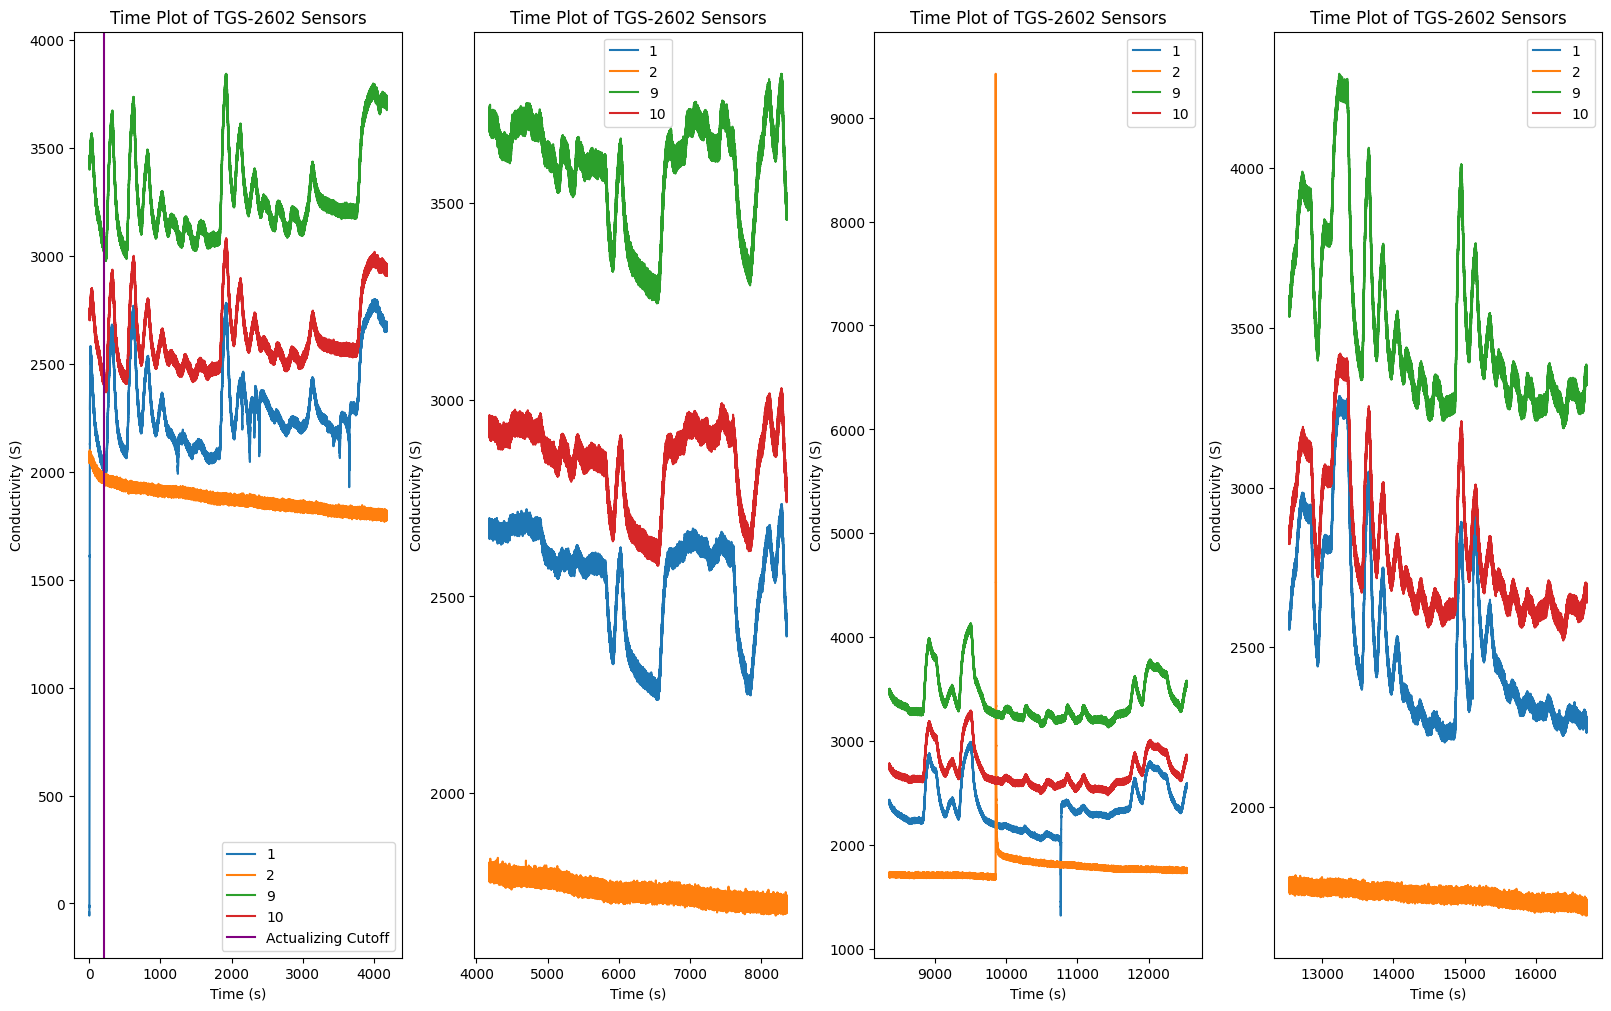

In [11]:
# Plot TG-2602 Sensors Over Time
sensors = [1, 2, 9, 10]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2602 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

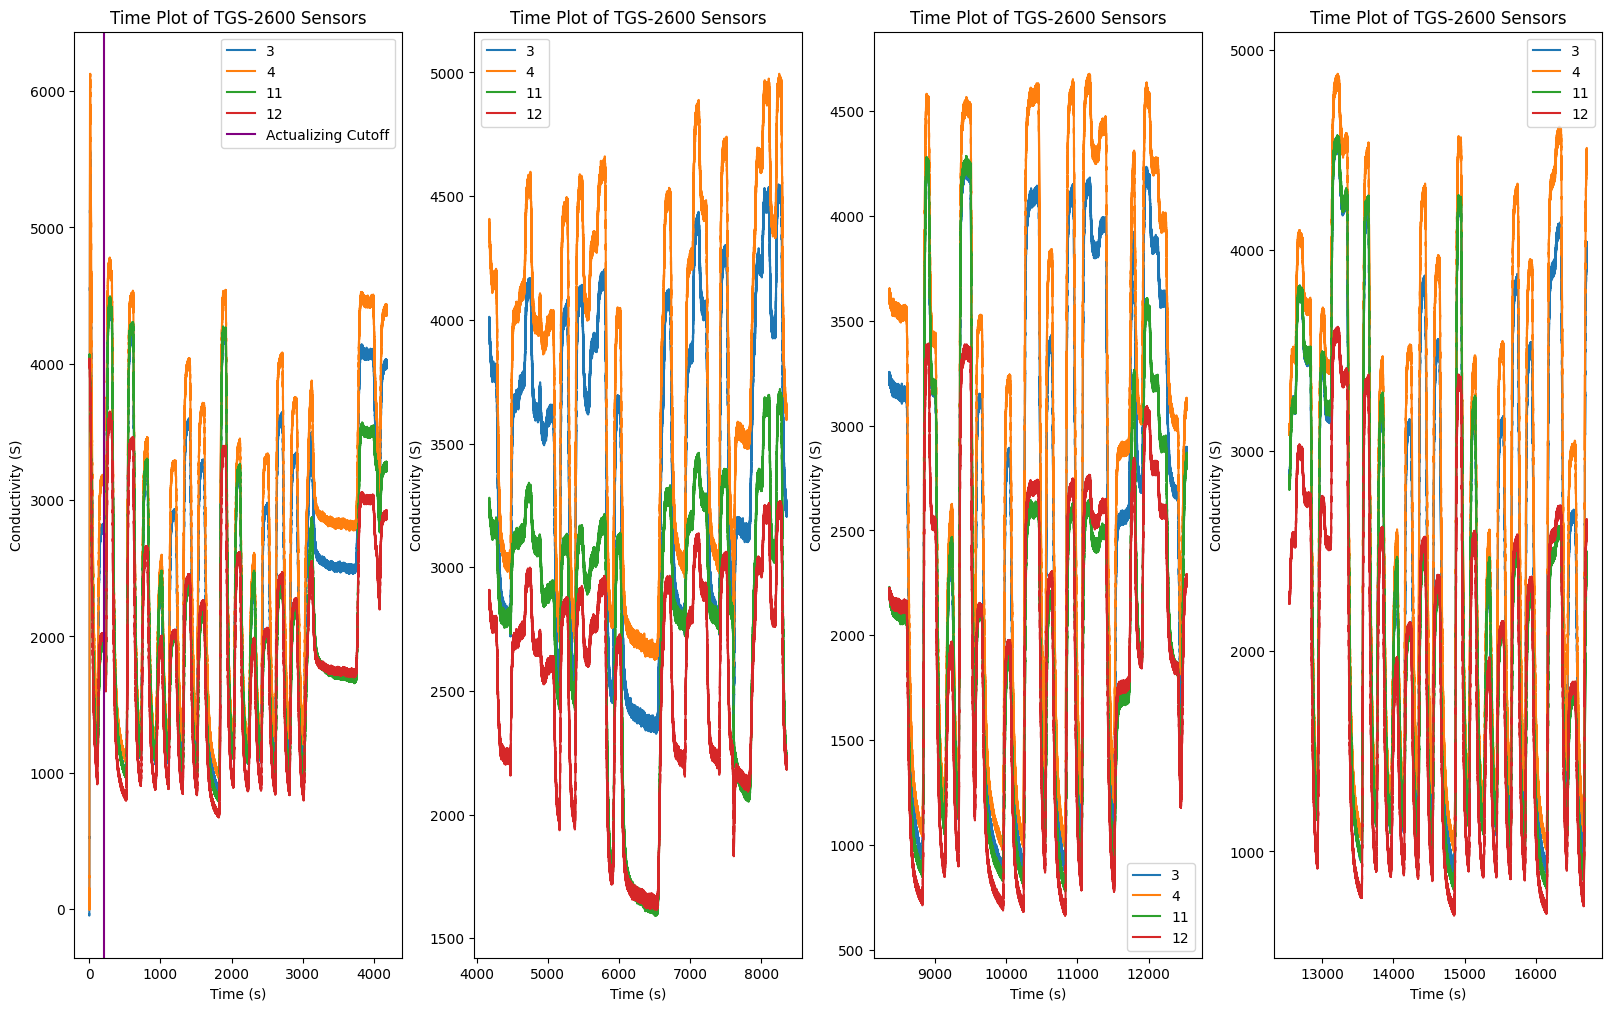

In [10]:
# Plot TG-2600 Sensors Over Time
sensors = [3, 4, 11, 12]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2600 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

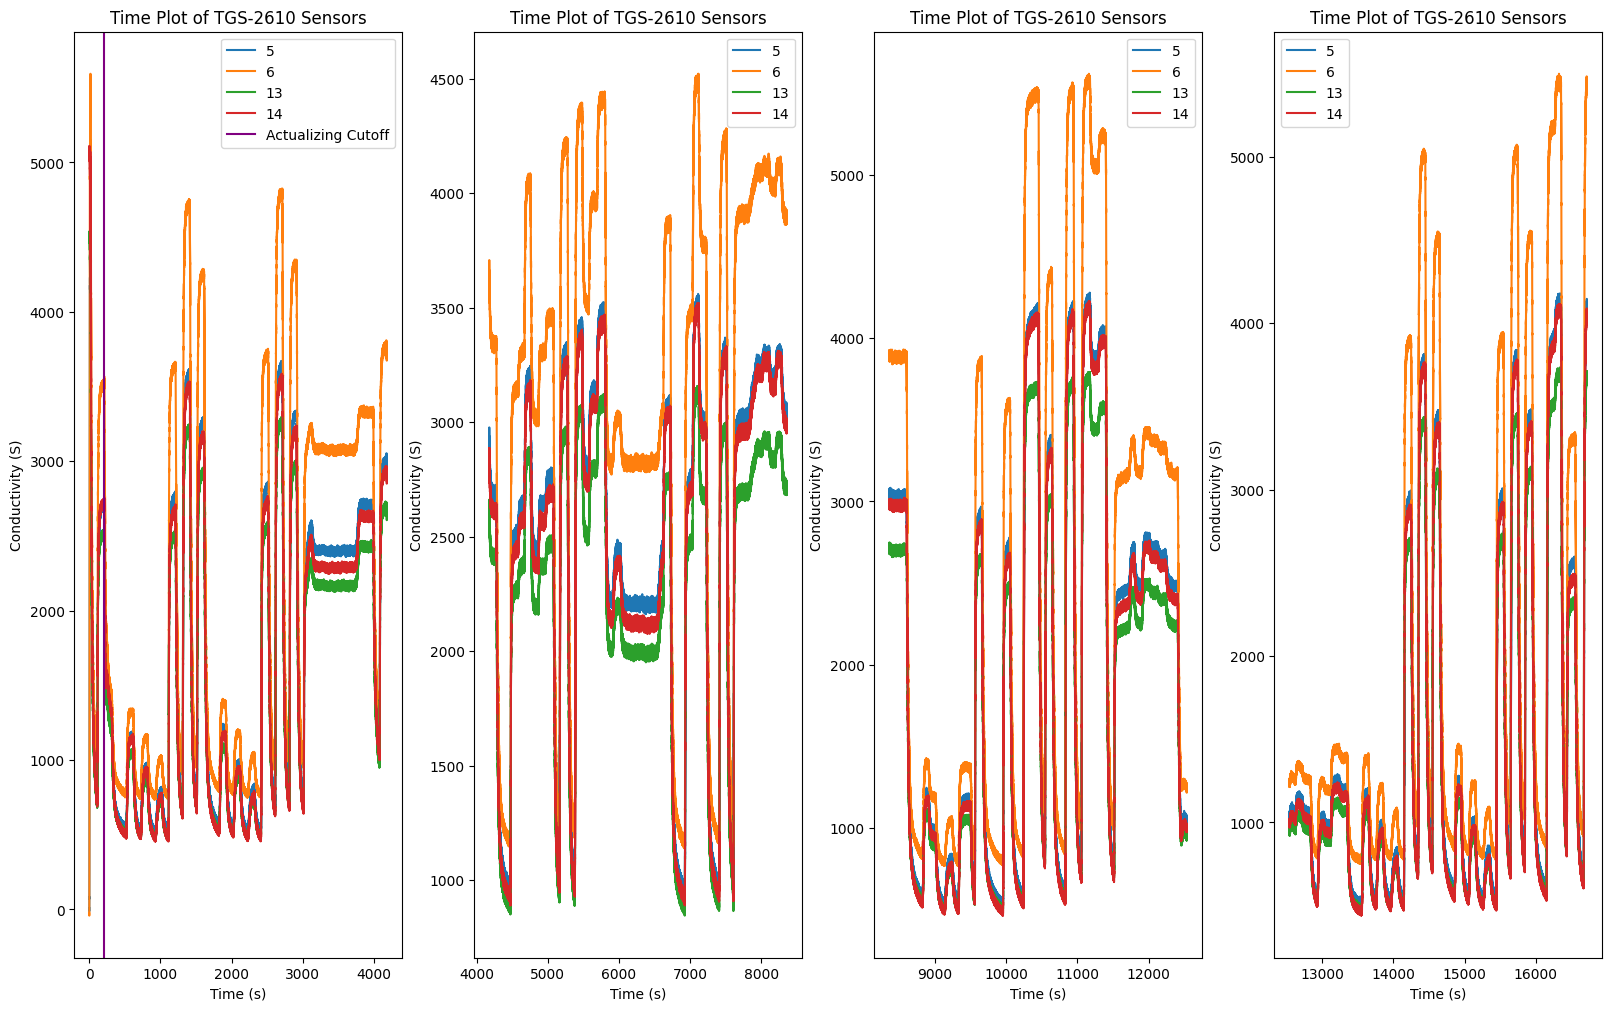

In [9]:
# Plot TG-2610 Sensors Over Time
sensors = [5, 6, 13, 14]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2610 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

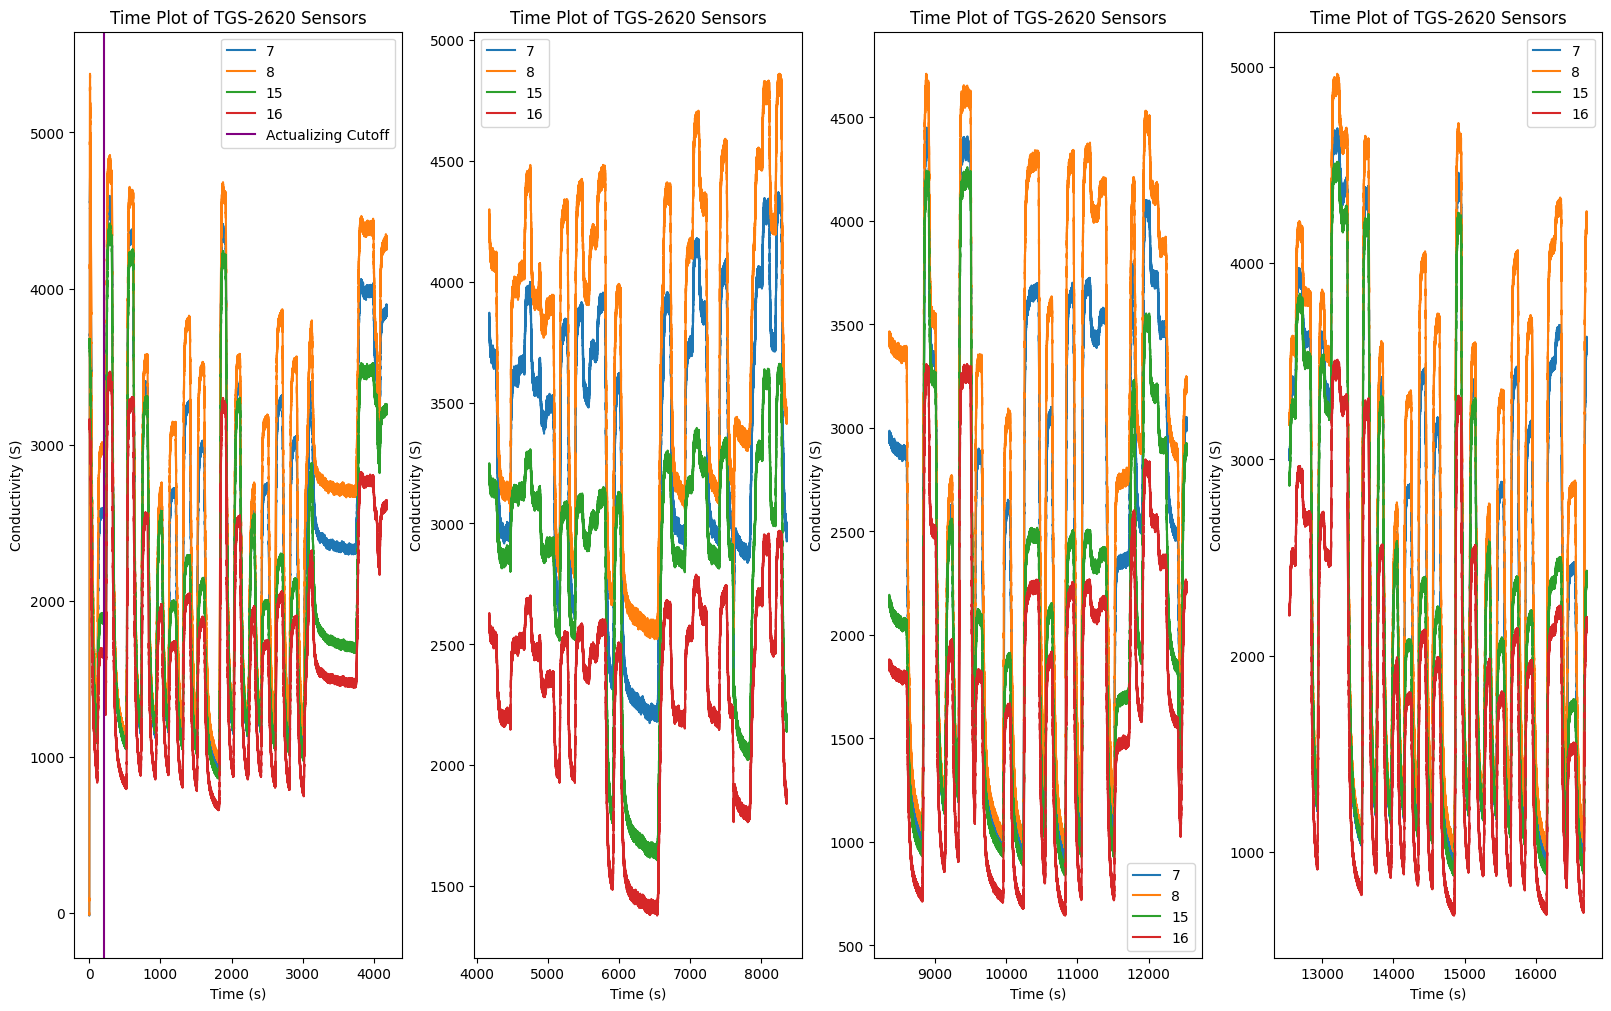

In [12]:
# Plot TG-2620 Sensors Over Time
sensors = [7, 8, 15, 16]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2620 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

Remove first 200 seconds -> sensor are actualizing first 200 seconds

In [13]:
train_df = train_df[20000:]
x1_train = x1_train[20000:]
y_train = y_train[20000:]

Sensor 2 is clearly broken. We need to remove it going forward.

In [14]:
# Contain all sensors except sensor 2
good_x_cols = ['Time', '1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
good_sensor_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# Dimensionality Reduction - Average Nonbroken Sensors of Same Type

We will be doing lots of feature engineering later on - need to reduce dimensions now to save compute power

In [25]:
x1_train[good_sensor_cols].mean(axis = 1)

1378906    2300.450667
1378907    2297.779333
1378908    2294.899333
1378909    2302.270000
1378910    2297.898000
              ...     
2778700    1689.791333
2778701    1690.582667
2778702    1688.458000
2778703    1689.967333
2778704    1689.706000
Length: 1399799, dtype: float64

In [15]:
# Define columns we want to take averages of 
# Note: Sensor 2 is broken - don't include it
tgs2602_cols = ['1', '9', '10']
tgs2600_cols = ['3', '4', '11', '12']
tgs2610_cols = ['5', '6', '13', '14']
tgs2620_cols = ['7', '8', '15', '16']


In [16]:
# Get the averages and combine them into a dataframe
x1_train_reduced = pd.concat([x1_train[tgs2602_cols].mean(axis = 1),
                              x1_train[tgs2600_cols].mean(axis = 1),
                              x1_train[tgs2610_cols].mean(axis = 1),
                              x1_train[tgs2620_cols].mean(axis = 1)
                              ], axis = 1)
x1_train_reduced.columns = ["tgs2602_avg", "tgs2600_avg", "tgs2610_avg", "tgs2620_avg"]
x1_test_reduced = pd.concat([x1_test[tgs2602_cols].mean(axis = 1),
                              x1_test[tgs2600_cols].mean(axis = 1),
                              x1_test[tgs2610_cols].mean(axis = 1),
                              x1_test[tgs2620_cols].mean(axis = 1)
                              ], axis = 1)
x1_test_reduced.columns = ["tgs2602_avg", "tgs2600_avg", "tgs2610_avg", "tgs2620_avg"]

In [35]:
x1_train_reduced.head(5)

,tgs2602_avg,tgs2600_avg,tgs2610_avg,tgs2620_avg
1378906,2953.296667,2577.7175,935.6300,2898.3700
1378907,2953.703333,2578.7900,931.6675,2890.9375
1378908,2944.643333,2583.0825,922.6675,2891.6400
1378909,2948.386667,2590.6275,933.8875,2897.7075
1378910,2955.156667,2582.5575,924.2075,2893.9850


In [36]:
x1_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399799 entries, 1378906 to 2778704
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   tgs2602_avg  1399799 non-null  float64
 1   tgs2600_avg  1399799 non-null  float64
 2   tgs2610_avg  1399799 non-null  float64
 3   tgs2620_avg  1399799 non-null  float64
dtypes: float64(4)
memory usage: 53.4 MB


## Perform EDA on the averages

In [17]:
# Combine the dataframes
train_reduced_df = pd.concat([x1_train["Time"], x1_train_reduced, y_train], axis = 1)
test_reduced_df = pd.concat([x1_test["Time"], x1_test_reduced, y_test], axis = 1)

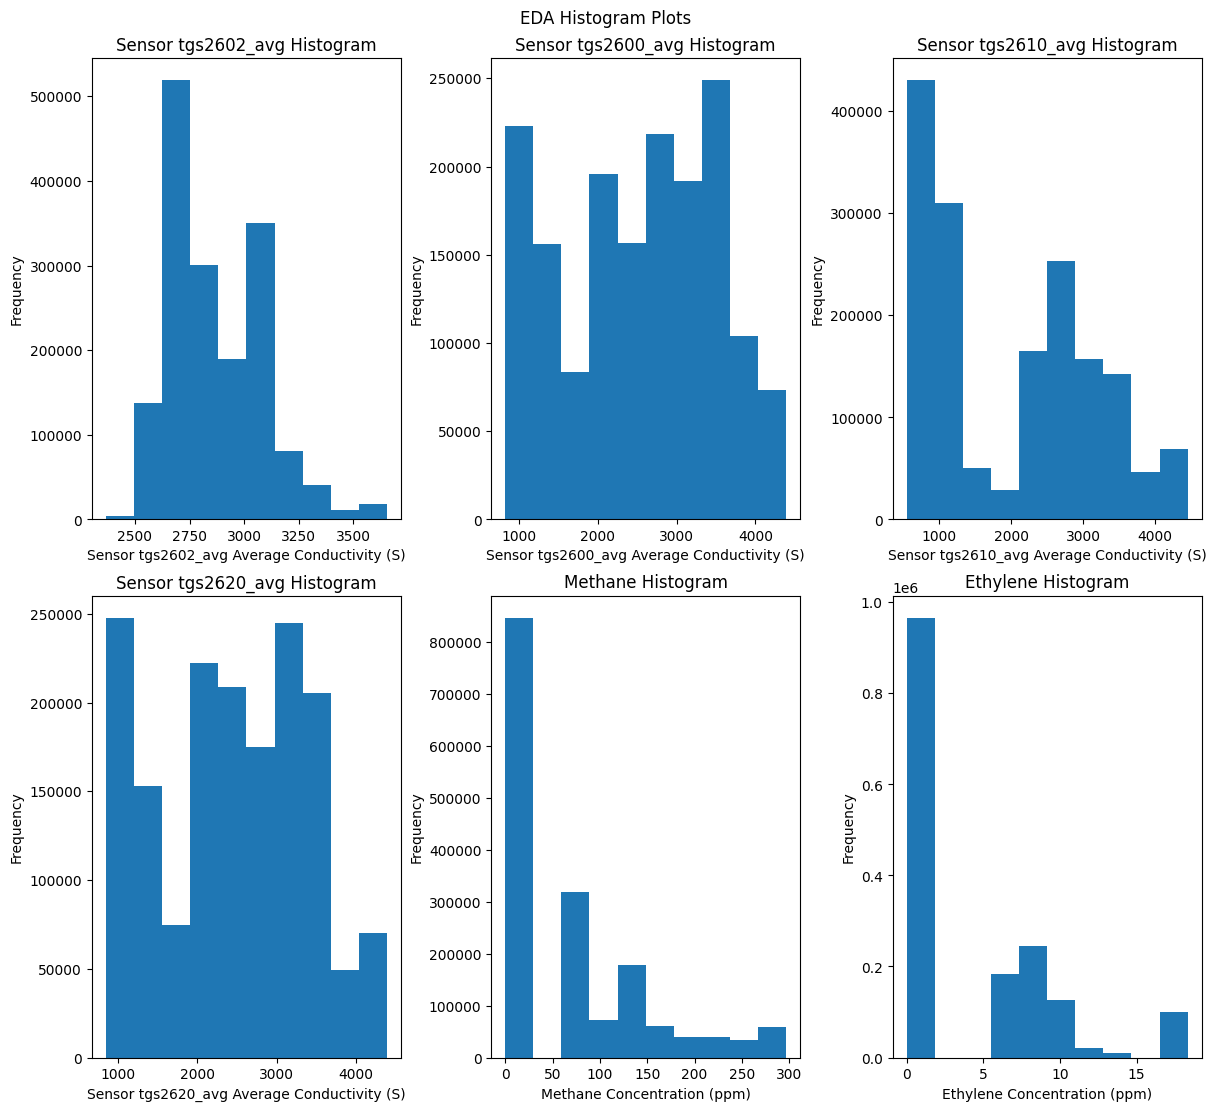

In [18]:
# Plot standard plots (all histograms + a time scatter plot)
num_features = len(train_reduced_df.columns)
fig = plt.figure(figsize = (12, 5 * num_features//3), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, num_features):
    ax1 = fig.add_subplot(num_features//3, 3, i)
    ax1.hist(train_reduced_df.iloc[:,i])
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:
        x_label_string = "Sensor " + x_label_string + " Average Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < num_features - 2:
        ax1.title.set_text("Sensor " + train_reduced_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_reduced_df.iloc[:,i].name + " Histogram") 
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


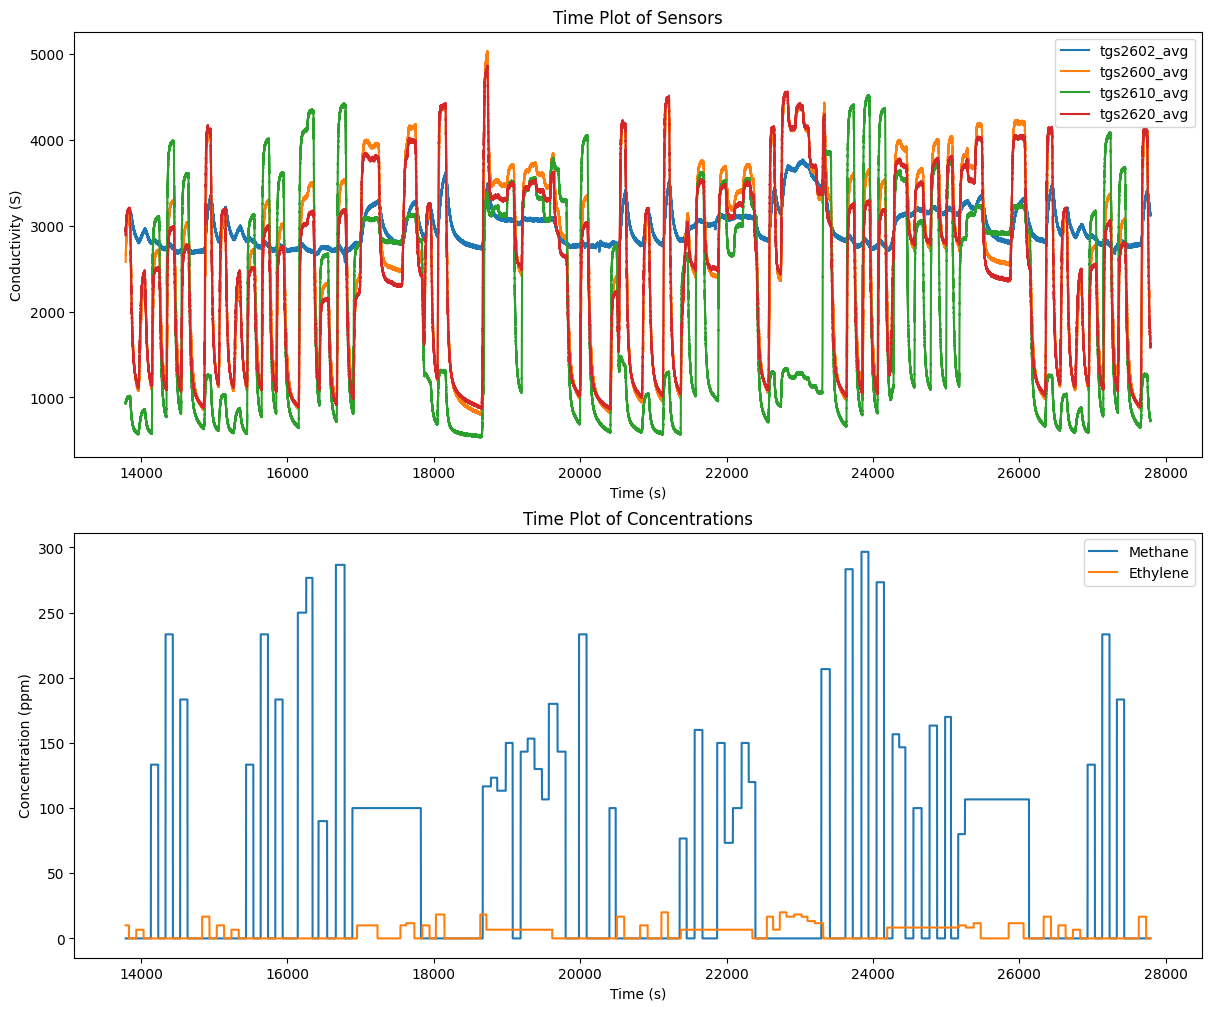

In [42]:
# Plot standard plots (all histograms + a time scatter plot)
num_features = len(train_reduced_df.columns)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, num_features):
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:
        ax_scatter_conduct.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

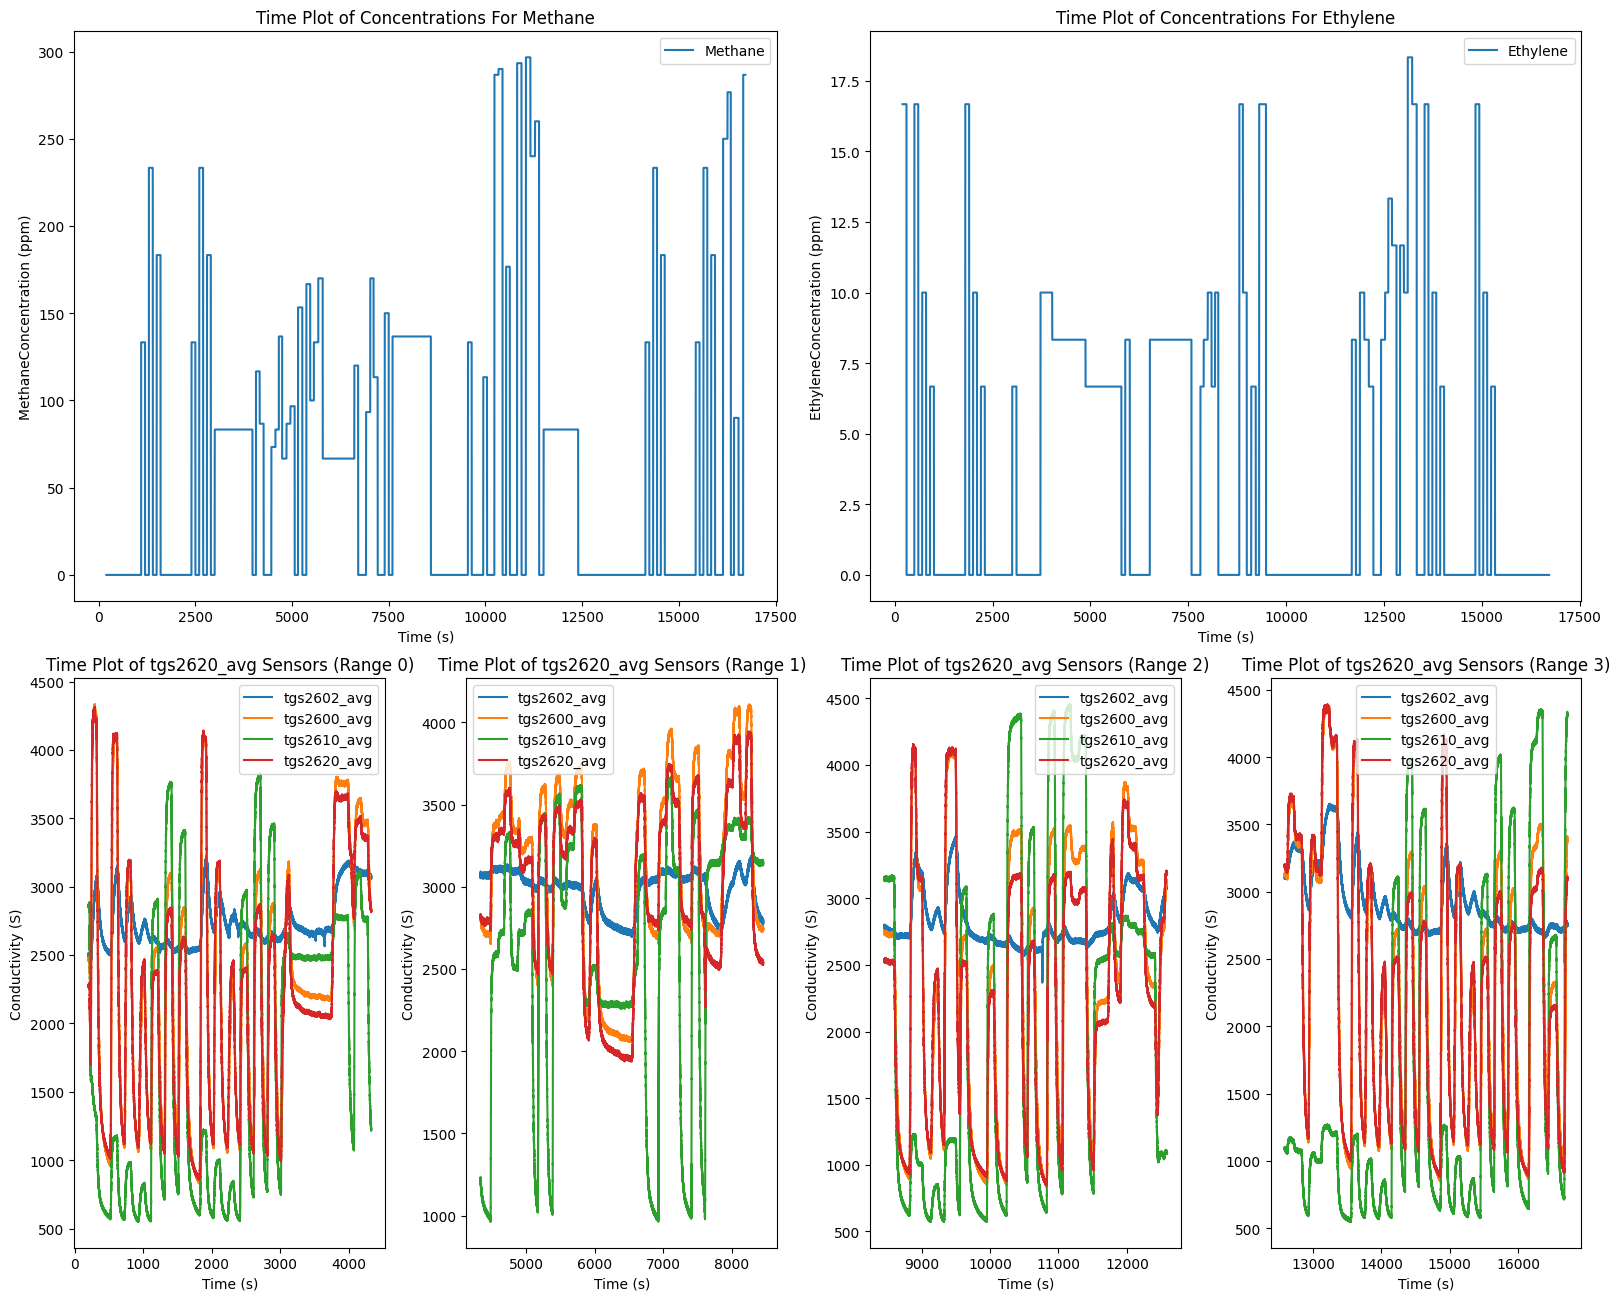

In [21]:
# Make EDA Plots
# Break the plots down into different ranges

num_features = len(train_reduced_df.columns)
data_len = train_reduced_df.shape[0]
# Cycler for conductivity plots
fig_conduct = plt.figure(figsize = (16, 30), layout = "constrained")
ax_scatter_concentration_meth = fig_conduct.add_subplot(5, 4, (1, 2))
ax_scatter_concentration_ethy = fig_conduct.add_subplot(5, 4, (3, 4))
ax_scatter_conduct_list = [fig_conduct.add_subplot(5, 4, 4 * 1 + sub_idx) for sub_idx in range(1, 4 + 1)]
for i in range(1, num_features):
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:            
        for j in range(4):
            ax_scatter_conduct = ax_scatter_conduct_list[j]
            ax_scatter_conduct.plot(train_reduced_df.iloc[j * data_len//4: (j + 1) * data_len//4,0], train_reduced_df.iloc[j * data_len//4: (j + 1) * data_len//4,i], label = x_label_string)
            ax_scatter_conduct.legend()
            ax_scatter_conduct.set_xlabel("Time (s)")
            ax_scatter_conduct.set_ylabel("Conductivity (S)")
            ax_scatter_conduct.title.set_text("Time Plot of {} Sensors (Range {})".format(x_label_string, j)) 
            ax_scatter_conduct.legend() 
    else:  
        if i == num_features - 1:
            ax_scatter_concentration = ax_scatter_concentration_ethy
        else:
            ax_scatter_concentration = ax_scatter_concentration_meth
        ax_scatter_concentration.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel(x_label_string + "Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations For " + x_label_string)
        ax_scatter_concentration.legend()   

# Define Helper Functions

## Define Metrics Function to easily get metrics

In [20]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, and MAE'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  mean = np.mean(actual)
  range_val = max(actual) - min(actual)

  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae)

## Define Preprocessing Classes and Functions

In [24]:

class MAD_Adder(BaseEstimator, TransformerMixin):
    '''Adds a Moving Average and Derivatives'''
    def __init__(self, min_window = 2, max_window = 20, max_deriv = 2, best_ma_window = 0, best_deriv_subset = [1], debug = True):
        self.min_window = min_window
        self.max_window = max_window
        self.max_deriv = max_deriv
        self.best_ma_window = best_ma_window
        self.best_deriv_subset = best_deriv_subset
        self.debug = debug 
    
    def get_best_ma_window(self, x_train, y_train, x_test, y_test):
        moving_average_metrics = []
        prev_train_rolling = []
        prev_test_rolling = []
        lr_models = []
        # keep track of the best model
        best_model = None 
        best_model_rmse_div_mean = float("inf")
        best_size = -1
        best_data = None

        # Loop from window size of 2 to 20.
        for i in range(self.min_window, self.max_window + 1):
            if self.debug:
                print("Checking window of size {}:".format(i))
            lr = LinearRegression(n_jobs = -1)
            x_train_rolling = x_train.rolling(i).mean()
            x_test_rolling = x_test.rolling(i).mean()
            # Fill NaN values - fill with smaller window
            x_train_rolling.iloc[0] = x_train.iloc[0]
            x_test_rolling.iloc[0] = x_test.iloc[0]
            prev_train_rolling.append(x_train_rolling.iloc[i - 2])
            prev_test_rolling.append(x_test_rolling.iloc[i - 2])
            # print(x_train_rolling.head(10))
            for j in range(2, i):
                x_train_rolling.iloc[j - 1] = prev_train_rolling[j - 2]
                x_test_rolling.iloc[j - 1] = prev_test_rolling[j - 2]
                
            # Fit the models
            lr.fit(x_train_rolling, y_train)
            
            # Get predictions
            lr_predictions = lr.predict(x_test_rolling)
            
            # Add the models to a list
            lr_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_predictions)
            moving_average_metrics.append(metrics)
            if self.debug:
                print("RMSE/Mean =", metrics[1])
            
            # Compare best 
            if metrics[1] < best_model_rmse_div_mean:
                best_model_rmse_div_mean = metrics[1]
                best_size = i
                best_model = lr
                best_data = [x_train_rolling, x_test_rolling]
        
        
        if self.debug:
            print("The best window size is {} with an RMSE/mean = {}".format(best_size, best_model_rmse_div_mean))
        return (best_model, best_data, best_model_rmse_div_mean, best_size)
    
    def get_all_subsets(self, lst):
        subsets = []
        n = len(lst)
        
        # Iterate through 2**n (total number of subsets for a set of size n)
        for i in range(2**n):
            subset = []
            
            for j in range(n):
                # Check if j-th bit in the binary representation of i is set
                if i & (1 << j):
                    subset.append(lst[j])
                    
            subsets.append(subset)
        return subsets
    
    def get_best_derivatives(self, window_size, x_train, y_train, x_test, y_test):
        deriv_list = [i + 1 for i in range(self.max_deriv)]
        deriv_subsets = self.get_all_subsets(deriv_list)[1:]
        lr_deriv_metrics = []
        lr_deriv_models = []
        # keep track of the best model
        lr_deriv_best_model = None 
        lr_deriv_best_model_rmse_div_mean = float("inf")
        lr_deriv_best_size = -1
        lr_deriv_best_data = None
        for i in range(len(deriv_subsets)):
            curr_subset = deriv_subsets[i]
            lr = LinearRegression(n_jobs = -1)
            deriv_list = []
            max_deriv = max(curr_subset)
            # Go and get the derivatives
            set_derivatives = False
            train_derivatives = None
            test_derivatives = None
            deriv_col_names = []
            if self.debug:
                print(curr_subset)
            for j in range(max_deriv):
                curr_deriv = j + 1
                if curr_deriv == 1:
                    curr_train_deriv = x_train.diff(window_size)/window_size
                    curr_test_deriv = x_test.diff(window_size)/window_size
                else:
                    curr_train_deriv = curr_train_deriv.diff(window_size)/window_size
                    curr_test_deriv = curr_test_deriv.diff(window_size)/window_size
                if curr_deriv in curr_subset:
                    # Get the column names 
                    curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in x_train.columns]
                    deriv_col_names = deriv_col_names + curr_deriv_col_names
                    
                    if set_derivatives:
                        # concatenate the derivative dataframes
                        train_derivatives = pd.concat([train_derivatives, curr_train_deriv], axis = 1)
                        test_derivatives = pd.concat([test_derivatives, curr_test_deriv], axis = 1)
                    else: 
                        train_derivatives = curr_train_deriv
                        test_derivatives = curr_test_deriv
                        set_derivatives = True
            # Create dataframes out of the derivative subsets
            train_derivatives.columns = deriv_col_names
            test_derivatives.columns = deriv_col_names
            # Replace NaN's with vales up ahead
            train_derivatives = train_derivatives.bfill()
            test_derivatives = test_derivatives.bfill()
            # Go and run linear regression now
            # Fit the models
            lr.fit(train_derivatives, y_train)
            # print(meth_train_derivatives.columns)
            # print(meth_test_derivatives.columns)
            # print(lr_deriv_meth_fitted.feature_names_in_)
            # Get predictions
            lr_deriv_predictions = lr.predict(test_derivatives)
            
            # Add the models to a list
            lr_deriv_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_deriv_predictions)
            lr_deriv_metrics.append(metrics)
            if self.debug == True:
                print("RMSE/Mean =", metrics[1])

            
            # Compare best 
            if metrics[1] < lr_deriv_best_model_rmse_div_mean:
                lr_deriv_best_model_rmse_div_mean = metrics[1]
                lr_deriv_best_size = curr_subset
                lr_deriv_best_model = lr
                lr_deriv_best_data = [train_derivatives, test_derivatives]
                
        if self.debug:
            print("The best derivatives are {} with an RMSE/mean = {}".format(lr_deriv_best_size, lr_deriv_best_model_rmse_div_mean))
        return (lr_deriv_best_model, lr_deriv_best_data, lr_deriv_best_model_rmse_div_mean, lr_deriv_best_size)
    
    def get_mad_features(self, x_train, y_train, x_test, y_test):
        '''Gets moving average and derivative features'''
        ma_features = self.get_best_ma_window(x_train, y_train, x_test, y_test)
        best_window = ma_features[3]
        d_features = self.get_best_derivatives(best_window, x_train, y_train, x_test, y_test)
        return (ma_features, d_features)
        
    def append_mad_features(self, separate, x_train, y_train, x_test, y_test):
        '''Appends moving average and derivative features to train and test sets'''
        mad_features = self.get_mad_features(x_train, y_train, x_test, y_test)
        ma_features = mad_features[0]
        d_features = mad_features[1]
        ma_data = ma_features[1]
        d_data = d_features[1]
        # Rename the moving average columns
        ma_data[0].columns = ["ma_{}".format(i) for i in ma_data[0].columns]
        ma_data[1].columns = ["ma_{}".format(i) for i in ma_data[1].columns]
        if separate:
            new_x_train = pd.concat([ma_data[0], d_data[0]], axis=1)
            new_x_test = pd.concat([ma_data[1], d_data[1]], axis=1)
        else:
            new_x_train = pd.concat([x_train, ma_data[0], d_data[0]], axis=1)
            new_x_test = pd.concat([x_test, ma_data[1], d_data[1]], axis=1)
        return (new_x_train, new_x_test, mad_features)
    
    def get_fixed_ma_window(self, window_size, x_data):
        '''Gets rolling average of fixed size from data'''
        prev_rolling = []

        # Loop from window size of 2 to 20.
        for i in range(2, window_size + 1):
            x_data_rolling = x_data.rolling(i).mean()
            # Fill NaN values - fill with smaller window
            x_data_rolling.iloc[0] = x_data.iloc[0]

            prev_rolling.append(x_data_rolling.iloc[i - 2])
            # print(x_train_rolling.head(10))
            for j in range(2, i):
                x_data_rolling.iloc[j - 1] = prev_rolling[j - 2]
                
        return x_data_rolling
    
    def get_fixed_derivatives(self, window_size, deriv_subset, x_data):
        '''Gets derivatives of fixed subset from data'''
        curr_subset = deriv_subset
        max_deriv = max(curr_subset)
        # Go and get the derivatives
        set_derivatives = False
        derivatives = None
        deriv_col_names = []
        for j in range(max_deriv):
            curr_deriv = j + 1
            if curr_deriv == 1:
                curr_data_deriv = x_data.diff(window_size)/window_size
            else:
                curr_data_deriv = curr_data_deriv.diff(window_size)/window_size
            if curr_deriv in curr_subset:
                # Get the column names 
                curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in x_data.columns]
                deriv_col_names = deriv_col_names + curr_deriv_col_names
                # print(curr_deriv, curr_deriv_col_names, deriv_col_names)
                if set_derivatives:
                    # concatenate the derivative dataframes
                    derivatives = pd.concat([derivatives, curr_data_deriv], axis = 1)
                    # print("Appending derivatives")
                else: 
                    derivatives = curr_data_deriv
                    set_derivatives = True
        # Create dataframes out of the derivative subsets
        derivatives.columns = deriv_col_names
        # Replace NaN's with vales up ahead
        derivatives = derivatives.bfill()
        return derivatives
    
    
    def get_fixed_mad_features(self, x_data, best_ma_window, best_deriv_subset):
        '''Gets fixed moving average and derivative features (no training)'''
        ma_features = self.get_fixed_ma_window(best_ma_window, x_data)
        d_features = self.get_fixed_derivatives(best_ma_window, best_deriv_subset, x_data)
        # Rename the moving average columns
        ma_features.columns = ["ma_{}".format(i) for i in ma_features.columns]
        new_x_data = pd.concat([x_data, ma_features, d_features], axis=1)
        return new_x_data
        
    def fit(self, X, y):
        return self
    
    def transform(self, x):
        fixed_mad_features = self.get_fixed_mad_features(x, self.best_ma_window, self.best_deriv_subset)
        return fixed_mad_features
        
    
        


## Define GridSearchCV Helper Functions

In [27]:
model_collections = {}

In [25]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [28]:
def optimize_halving_pipeline(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    orig_cols = x_train.columns
    feature_adder = ColumnTransformer(transformers = [
        ("mad_adder", MAD_Adder(best_ma_window=2, best_deriv_subset=[1, 2]), orig_cols),
        ('poly_features', PolynomialFeatures(2), orig_cols)
    ], remainder = "passthrough")
    pipe = Pipeline([
        ('feature_adder', feature_adder),
        ('scaler', RobustScaler()),
        ('transformer', PowerTransformer()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])
    total_param_grid = {}
    for key in param_grid.keys():
      total_param_grid["model__" + key] = param_grid[key]
    grid = HalvingGridSearchCV(estimator= pipe,
                      param_grid = total_param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

# Get Specific Y Values

In [29]:
y_meth_train = y_train["Methane"]
y_meth_test = y_test["Methane"]
y_ethy_train = y_train["Ethylene"]
y_ethy_test = y_test["Ethylene"]

In [30]:
y_meth_train_vals = y_meth_train.values
y_meth_test_vals = y_meth_test.values
y_ethy_train_vals = y_ethy_train.values
y_ethy_test_vals = y_ethy_test.values

# Compare Linear Regression Results With No Other Preprocessing

In [52]:
lr_meth_no_preprocessing = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train, y_meth_train, x1_test, y_meth_test)
print(lr_meth_no_preprocessing[3])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1399799
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1399799
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(38.80765233945534, 0.8708673286769062, 0.13859875835519764, 4.3232987417887096e+16, 19.737984501847244)


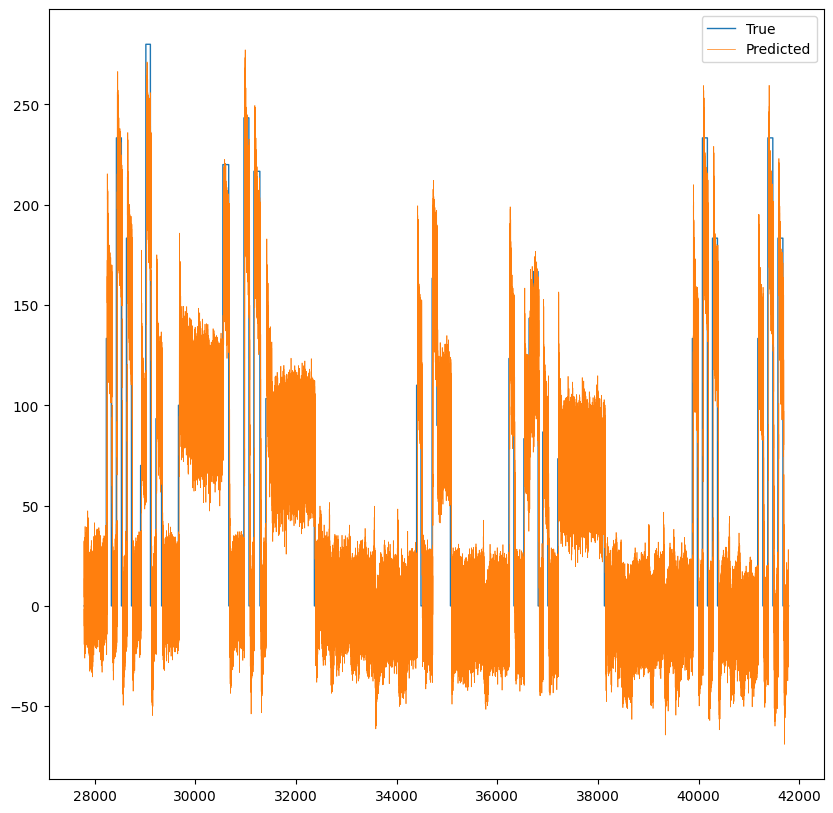

In [112]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, lr_meth_no_preprocessing[2], label = "Predicted",linewidth=0.5)
plt.legend()

In [53]:
lr_meth_avg_raw = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train_reduced, y_meth_train, x1_test_reduced, y_meth_test)
print(lr_meth_avg_raw[3])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1399799
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1399799
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(43.36777737807174, 0.9731993088769814, 0.15488491920739908, 6.274689401506499e+16, 27.684786565070407)


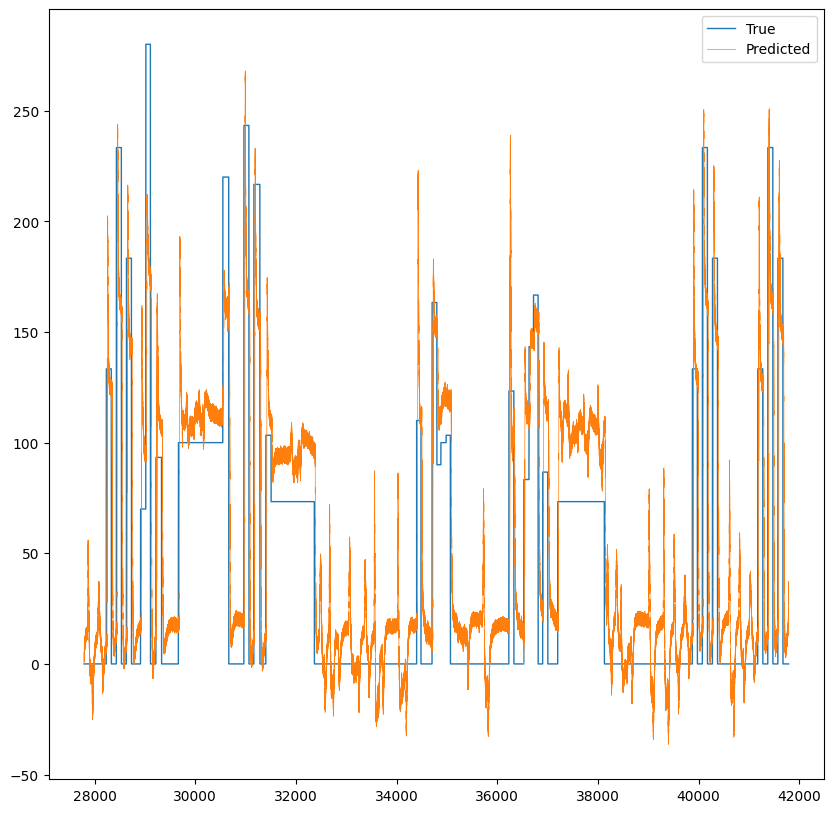

In [113]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, lr_meth_avg_raw[2], label = "Predicted",linewidth=0.5)
plt.legend()

# Perform Feature Engineering

## Get Derivatives and Moving Averages

In [31]:
mad_adder = MAD_Adder(max_deriv = 2)

In [32]:
# Get methane train and test x sets with rolling average and derivative features
# mad_meth_data = mad_adder.get_fixed_mad_features(True, 2, [1, 2])
mad_meth_train = mad_adder.get_fixed_mad_features(x1_train_reduced, 2, [1, 2])
mad_meth_test = mad_adder.get_fixed_mad_features(x1_test_reduced, 2, [1, 2])
print(mad_meth_train.head(10), mad_meth_test.head(10))

       tgs2602_avg  tgs2600_avg  tgs2610_avg  tgs2620_avg  ma_tgs2602_avg  \
20000  2507.930000    2468.1800    2863.8975    2270.8175     2507.930000   
20001  2498.106667    2468.4525    2861.5425    2271.8975     2503.018333   
20002  2506.200000    2461.6750    2861.4400    2281.2550     2502.153333   
20003  2503.563333    2466.1425    2862.6625    2271.5125     2504.881667   
20004  2498.760000    2469.2350    2864.3825    2267.8450     2501.161667   
20005  2512.536667    2469.4175    2859.8625    2271.9625     2505.648333   
20006  2506.426667    2469.7400    2855.9575    2275.0425     2509.481667   
20007  2499.590000    2468.9750    2864.7700    2263.4850     2503.008333   
20008  2505.523333    2472.4500    2856.0975    2272.4350     2502.556667   
20009  2500.940000    2474.9725    2859.7125    2266.5100     2503.231667   

       ma_tgs2600_avg  ma_tgs2610_avg  ma_tgs2620_avg  d1_tgs2602_avg  \
20000      2468.18000      2863.89750      2270.81750       -0.865000   
20001 

In [33]:
# Get ethylene train and test x sets with rolling average and derivative features
# mad_meth_data = mad_adder.get_fixed_mad_features(True, 2, [1, 2])
mad_ethy_train = mad_adder.get_fixed_mad_features(x1_train_reduced, 2, [1, 2])
mad_ethy_test = mad_adder.get_fixed_mad_features(x1_test_reduced, 2, [1, 2])
print(mad_ethy_train.head(10), mad_ethy_test.head(10))

       tgs2602_avg  tgs2600_avg  tgs2610_avg  tgs2620_avg  ma_tgs2602_avg  \
20000  2507.930000    2468.1800    2863.8975    2270.8175     2507.930000   
20001  2498.106667    2468.4525    2861.5425    2271.8975     2503.018333   
20002  2506.200000    2461.6750    2861.4400    2281.2550     2502.153333   
20003  2503.563333    2466.1425    2862.6625    2271.5125     2504.881667   
20004  2498.760000    2469.2350    2864.3825    2267.8450     2501.161667   
20005  2512.536667    2469.4175    2859.8625    2271.9625     2505.648333   
20006  2506.426667    2469.7400    2855.9575    2275.0425     2509.481667   
20007  2499.590000    2468.9750    2864.7700    2263.4850     2503.008333   
20008  2505.523333    2472.4500    2856.0975    2272.4350     2502.556667   
20009  2500.940000    2474.9725    2859.7125    2266.5100     2503.231667   

       ma_tgs2600_avg  ma_tgs2610_avg  ma_tgs2620_avg  d1_tgs2602_avg  \
20000      2468.18000      2863.89750      2270.81750       -0.865000   
20001 

## Get 2nd Order Polynomial Features

In [70]:
# Make the polynomial features with order = 2
poly_features = PolynomialFeatures(2)

In [79]:
# Train the polynomial transformer on the train data
poly_features.fit(x1_train_reduced)

PolynomialFeatures()

In [80]:
# Transform the train data on the fitted polynomial features
x_train_poly = poly_features.transform(x1_train_reduced)

In [81]:
# Transform the test data on the fitted polynomial features
x_test_poly = poly_features.transform(x1_test_reduced)

In [94]:
x_train_poly_df = pd.DataFrame(x_train_poly, columns = poly_features.get_feature_names_out())
# Rename intercept
x_train_poly_df.columns = ["intercept"] + list(x_train_poly_df.columns[1:])
x_test_poly_df = pd.DataFrame(x_test_poly, columns = poly_features.get_feature_names_out())
# Rename intercept
x_test_poly_df.columns = ["intercept"] + list(x_test_poly_df.columns[1:])

In [93]:
x_train_poly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399799 entries, 0 to 1399798
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   intercept                1399799 non-null  float64
 1   tgs2602_avg              1399799 non-null  float64
 2   tgs2600_avg              1399799 non-null  float64
 3   tgs2610_avg              1399799 non-null  float64
 4   tgs2620_avg              1399799 non-null  float64
 5   tgs2602_avg^2            1399799 non-null  float64
 6   tgs2602_avg tgs2600_avg  1399799 non-null  float64
 7   tgs2602_avg tgs2610_avg  1399799 non-null  float64
 8   tgs2602_avg tgs2620_avg  1399799 non-null  float64
 9   tgs2600_avg^2            1399799 non-null  float64
 10  tgs2600_avg tgs2610_avg  1399799 non-null  float64
 11  tgs2600_avg tgs2620_avg  1399799 non-null  float64
 12  tgs2610_avg^2            1399799 non-null  float64
 13  tgs2610_avg tgs2620_avg  1399799 non-null 

## Append the Moving Average And Derivative Features to the Polynomial Features

In [100]:
mad_meth_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399799 entries, 1378906 to 2778704
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ma_tgs2602_avg  1399799 non-null  float64
 1   ma_tgs2600_avg  1399799 non-null  float64
 2   ma_tgs2610_avg  1399799 non-null  float64
 3   ma_tgs2620_avg  1399799 non-null  float64
 4   d1_tgs2602_avg  1399799 non-null  float64
 5   d1_tgs2600_avg  1399799 non-null  float64
 6   d1_tgs2610_avg  1399799 non-null  float64
 7   d1_tgs2620_avg  1399799 non-null  float64
 8   d2_tgs2602_avg  1399799 non-null  float64
 9   d2_tgs2600_avg  1399799 non-null  float64
 10  d2_tgs2610_avg  1399799 non-null  float64
 11  d2_tgs2620_avg  1399799 non-null  float64
 12  d3_tgs2602_avg  1399799 non-null  float64
 13  d3_tgs2600_avg  1399799 non-null  float64
 14  d3_tgs2610_avg  1399799 non-null  float64
 15  d3_tgs2620_avg  1399799 non-null  float64
dtypes: float64(16)
memory usage: 181.6 

In [107]:
x_meth_train_fe = pd.concat([x_train_poly_df, mad_meth_train.reset_index(drop = True)], axis = 1)
x_meth_test_fe = pd.concat([x_test_poly_df, mad_meth_test.reset_index(drop = True)], axis = 1)
x_ethy_train_fe = pd.concat([x_train_poly_df, mad_ethy_train.reset_index(drop = True)], axis = 1)
x_ethy_test_fe = pd.concat([x_test_poly_df, mad_ethy_test.reset_index(drop = True)], axis = 1)

In [109]:
x_meth_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399799 entries, 0 to 1399798
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   intercept                1399799 non-null  float64
 1   tgs2602_avg              1399799 non-null  float64
 2   tgs2600_avg              1399799 non-null  float64
 3   tgs2610_avg              1399799 non-null  float64
 4   tgs2620_avg              1399799 non-null  float64
 5   tgs2602_avg^2            1399799 non-null  float64
 6   tgs2602_avg tgs2600_avg  1399799 non-null  float64
 7   tgs2602_avg tgs2610_avg  1399799 non-null  float64
 8   tgs2602_avg tgs2620_avg  1399799 non-null  float64
 9   tgs2600_avg^2            1399799 non-null  float64
 10  tgs2600_avg tgs2610_avg  1399799 non-null  float64
 11  tgs2600_avg tgs2620_avg  1399799 non-null  float64
 12  tgs2610_avg^2            1399799 non-null  float64
 13  tgs2610_avg tgs2620_avg  1399799 non-null 

# Redo EDA

# Perform Robust Scaler on Data 

In [120]:
# Create scaler
robust_meth_scaler = RobustScaler()
robust_ethy_scaler = RobustScaler()

In [121]:
# First, train all the data on the scalers
robust_meth_scaler.fit(x_meth_train_fe, y_train)
robust_ethy_scaler.fit(x_meth_train_fe, y_train)

RobustScaler()

In [122]:
# Second, transform all the train data on the fitted scalers
x_meth_train_fe_robust = robust_meth_scaler.transform(x_meth_train_fe)
x_ethy_train_fe_robust = robust_ethy_scaler.transform(x_meth_train_fe)

In [123]:
# Third, transform all the test data on the fitted scalers
x_meth_test_fe_robust = robust_meth_scaler.transform(x_meth_test_fe)
x_ethy_test_fe_robust = robust_ethy_scaler.transform(x_ethy_test_fe)

# Perform Power Transformer on Data 

In [124]:
# Create transformers
meth_power_transformer = PowerTransformer()
ethy_power_transformer = PowerTransformer()

In [125]:
# First, train all the data on the transformers
meth_power_transformer.fit(x_meth_train_fe_robust, y_train)
ethy_power_transformer.fit(x_ethy_train_fe_robust, y_train)

PowerTransformer()

In [126]:
# Second, transform all the train data on the fitted scalers
x_meth_train_ferp = meth_power_transformer.transform(x_meth_train_fe_robust)
x_ethy_train_ferp = ethy_power_transformer.transform(x_ethy_train_fe_robust)

In [127]:
# Third, transform all the test data on the fitted scalers
x_meth_test_ferp = meth_power_transformer.transform(x_meth_test_fe_robust)
x_ethy_test_ferp = ethy_power_transformer.transform(x_ethy_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [130]:
pca_meth = PCA()
pca_meth.fit(x_meth_train_ferp)
pca_ethy = PCA()
pca_ethy.fit(x_ethy_train_ferp)

PCA()

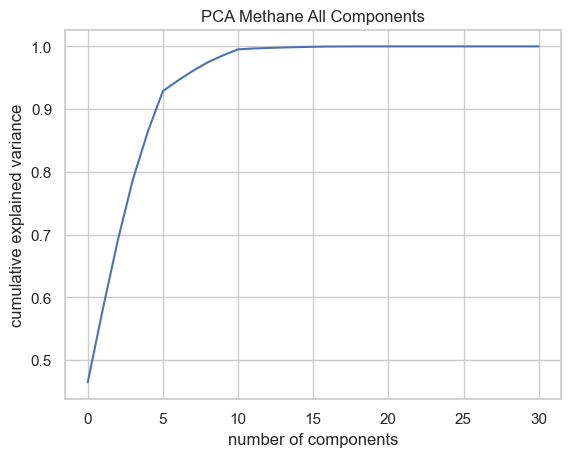

None

In [131]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

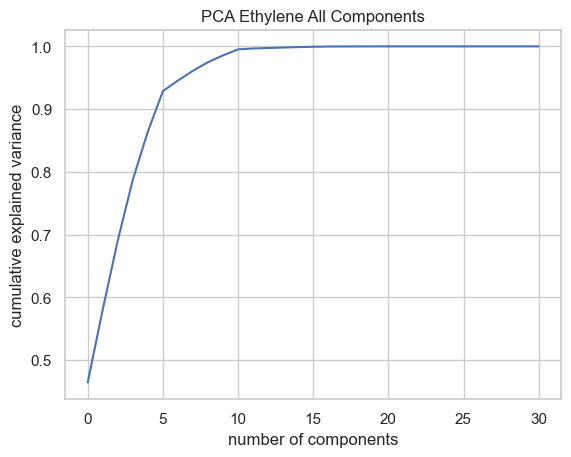

None

In [132]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [133]:
# Implement 0.95 variance threshold
pca_meth_best = PCA(n_components=0.95)
pca_meth_best.fit(x_meth_train_ferp)
pca_ethy_best = PCA(n_components=0.95)
pca_ethy_best.fit(x_ethy_train_ferp)

PCA(n_components=0.95)

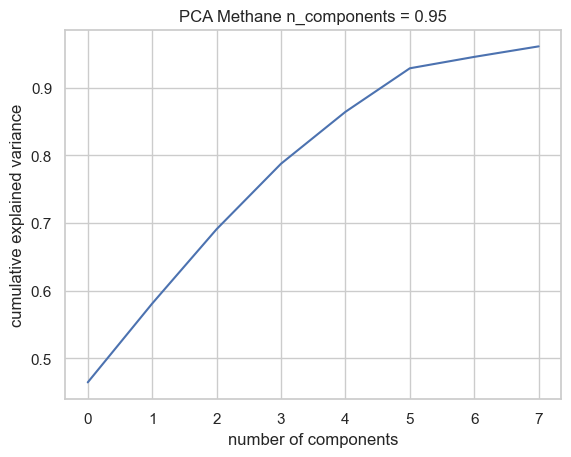

None

In [134]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

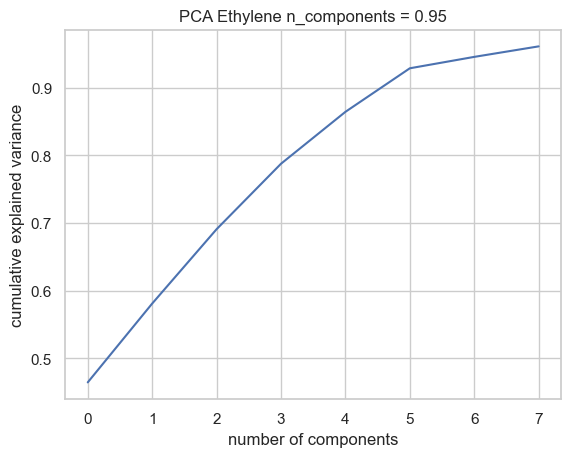

None

In [135]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [136]:
# Fit the PCA on the data
x_meth_train_preprocessed = pca_meth_best.transform(x_meth_train_ferp)
x_ethy_train_preprocessed = pca_ethy_best.transform(x_ethy_train_ferp)
x_meth_test_preprocessed = pca_meth_best.transform(x_meth_test_ferp)
x_ethy_test_preprocessed = pca_ethy_best.transform(x_ethy_test_ferp)

# Run Linear SVR

In [137]:
optim_lsvr_meth = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lsvr_meth[3])
model_collections["optim_lsvr_meth"] = optim_lsvr_meth

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1399799
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1399799
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(45.918104196164556, 1.030430194267786, 0.16399322927201626, 5.341310075148671e+16, 26.854159044504897)


In [ ]:
# Save the model to a file
import joblib
joblib.dump(optim_lsvr_meth, "models/best_meth_poly_lsvr.pkl")

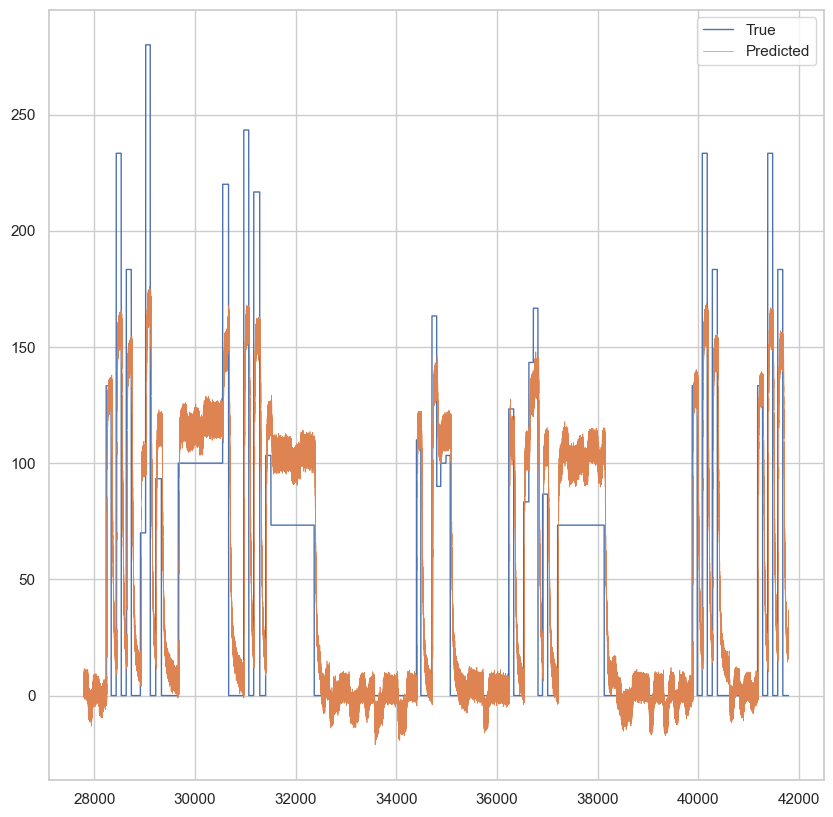

In [138]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, optim_lsvr_meth[2], label = "Predicted",linewidth=0.5)
plt.legend()